In [1]:
import pandas as pd
import numpy as np


In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")


In [3]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_items = pd.merge(order_items, product[
        ["product_id", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]],
                           on="product_id")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,650.0,28.0,9.0,14.0


In [5]:
# calculate order information based on the products inside
order_items = order_items.groupby(["order_id", "seller_id", "product_id"])[
        ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].sum()
order_items.reset_index(inplace=True)
order_items.head()

,order_id,seller_id,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,e5f2d52b802189ee658865ca93d83a8f,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,c777355d18b72b67abbeef9df44fd0fd,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,7634da152a4610f1595efa32f14722fc,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,ac6c3623068f30de03045865e4e10089,3750.0,35.0,40.0,30.0


In [6]:
# include shippment time information
orders = pd.merge(orders, order_items[
        ["order_id", "product_id", "seller_id", "product_weight_g", "product_length_cm", "product_height_cm",
         "product_width_cm"]], on="order_id")
# include cutomer location information
orders = pd.merge(orders,
                          customers[["customer_id", "customer_city", "customer_state", "customer_zip_code_prefix"]],
                          on="customer_id")
# unify the logitude and latitude of each zip code, so that can merger 
geolocation = geolocation.groupby("geolocation_zip_code_prefix").agg(
        {"geolocation_lat": "mean", "geolocation_lng": "mean"})
geolocation.reset_index(inplace=True)

orders = pd.merge(orders, geolocation, left_on="customer_zip_code_prefix",
                          right_on="geolocation_zip_code_prefix")
orders.rename(
        columns={"geolocation_lat": "customer_geolocation_lat", "geolocation_lng": "customer_geolocation_lng"},
        inplace=True)


In [7]:
# include seller location
orders = pd.merge(orders, sellers[["seller_id", "seller_city", "seller_state", "seller_zip_code_prefix"]],
                          on="seller_id")
orders = pd.merge(orders, geolocation, left_on="seller_zip_code_prefix",
                          right_on="geolocation_zip_code_prefix")
orders.rename(
        columns={"geolocation_lat": "seller_geolocation_lat", "geolocation_lng": "seller_geolocation_lng"},
        inplace=True)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,customer_zip_code_prefix,geolocation_zip_code_prefix_x,customer_geolocation_lat,customer_geolocation_lng,seller_city,seller_state,seller_zip_code_prefix,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,3149,3149,-23.576983,-46.587161,maua,SP,9350,9350,-23.680729,-46.444238
1,de01100645b731556de153cfbebc35b1,94602ee2b2723266d391c94e7d1f4d89,delivered,2017-08-07 12:13:26,2017-08-07 12:43:37,2017-08-08 13:32:49,2017-08-17 18:24:38,2017-08-29 00:00:00,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,...,35400,35400,-20.391011,-43.507047,maua,SP,9350,9350,-23.680729,-46.444238
2,e55fb3457f263ce9c93e88a934d7cc17,f185f0c103eaf4cdb003c5fd33d29a9c,delivered,2017-09-06 09:52:11,2017-09-06 10:05:16,2017-09-08 16:14:11,2017-09-16 16:19:28,2017-09-19 00:00:00,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,...,13186,13186,-22.889982,-47.198980,maua,SP,9350,9350,-23.680729,-46.444238
3,1f201b2bf1eecbd0ad32c3f430846b84,856f3263eb7af3a48765c85d4d0eea1d,delivered,2017-09-26 21:32:17,2017-09-26 21:49:42,2017-09-28 15:28:03,2017-10-03 13:38:04,2017-10-11 00:00:00,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,...,5782,5782,-23.651294,-46.766853,maua,SP,9350,9350,-23.680729,-46.444238
4,88407c8c6e12493ff6e845df39540112,e902cb9d9992a69a267f69dec57aa3a3,delivered,2017-08-15 02:03:01,2017-08-15 02:15:13,2017-08-16 15:52:29,2017-08-25 21:59:26,2017-08-28 00:00:00,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,...,13060,13060,-22.931980,-47.111841,maua,SP,9350,9350,-23.680729,-46.444238


In [8]:
orders = orders.dropna()

In [9]:
# filter the data
# We need to remove the orders with more than one product and only keep the orders with only one product
# Because the given delivery time is based on the last product's delivery time and if there are many products
# in one order and were delivered at different time, the delivery time is not accurate for the first product.
single_order_index = orders["order_id"].value_counts()[orders["order_id"].value_counts() == 1].index
orders = orders[orders.order_id.isin(single_order_index)]
orders.reset_index(drop=True, inplace=True)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,customer_zip_code_prefix,geolocation_zip_code_prefix_x,customer_geolocation_lat,customer_geolocation_lng,seller_city,seller_state,seller_zip_code_prefix,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,3149,3149,-23.576983,-46.587161,maua,SP,9350,9350,-23.680729,-46.444238
1,de01100645b731556de153cfbebc35b1,94602ee2b2723266d391c94e7d1f4d89,delivered,2017-08-07 12:13:26,2017-08-07 12:43:37,2017-08-08 13:32:49,2017-08-17 18:24:38,2017-08-29 00:00:00,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,...,35400,35400,-20.391011,-43.507047,maua,SP,9350,9350,-23.680729,-46.444238
2,e55fb3457f263ce9c93e88a934d7cc17,f185f0c103eaf4cdb003c5fd33d29a9c,delivered,2017-09-06 09:52:11,2017-09-06 10:05:16,2017-09-08 16:14:11,2017-09-16 16:19:28,2017-09-19 00:00:00,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,...,13186,13186,-22.889982,-47.198980,maua,SP,9350,9350,-23.680729,-46.444238
3,1f201b2bf1eecbd0ad32c3f430846b84,856f3263eb7af3a48765c85d4d0eea1d,delivered,2017-09-26 21:32:17,2017-09-26 21:49:42,2017-09-28 15:28:03,2017-10-03 13:38:04,2017-10-11 00:00:00,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,...,5782,5782,-23.651294,-46.766853,maua,SP,9350,9350,-23.680729,-46.444238
4,88407c8c6e12493ff6e845df39540112,e902cb9d9992a69a267f69dec57aa3a3,delivered,2017-08-15 02:03:01,2017-08-15 02:15:13,2017-08-16 15:52:29,2017-08-25 21:59:26,2017-08-28 00:00:00,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,...,13060,13060,-22.931980,-47.111841,maua,SP,9350,9350,-23.680729,-46.444238


In [10]:
# only keep delivered orders
orders = orders[orders["order_status"] == "delivered"]
# convert time columns to datetime type
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


In [11]:
# remove orders that are delivered before approved
approve_before_index = orders[orders["order_approved_at"] >= orders["order_delivered_customer_date"]].index
orders = orders[~orders.index.isin(approve_before_index)]
orders.reset_index(drop=True, inplace=True)
# purchase made at which day of the week and month may also affect the delivery time
# so we make new columns for these two feature
orders["day_name"] = orders["order_purchase_timestamp"].apply(lambda x: x.day_name())
orders["purchase_month"] = orders["order_purchase_timestamp"].apply(lambda x: x.month)
# time taken from purchase to delivered
orders["order_completion_day"] = [
        (pd.to_datetime(d.strftime("%Y-%m-%d")) - pd.to_datetime(t.strftime("%Y-%m-%d"))).days
        for d, t in zip(orders["order_delivered_customer_date"], orders["order_purchase_timestamp"])]
# calculate distance
orders["euclidean_distance"] = (np.sqrt(((orders["customer_geolocation_lat"] - orders["seller_geolocation_lat"]) ** 2) +
                                          ((orders["customer_geolocation_lng"] - orders["seller_geolocation_lng"]) ** 2)))


In [12]:
# numerical features
numerical_features = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_completion_day', 'euclidean_distance']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92741 entries, 0 to 92740
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       92741 non-null  object        
 1   customer_id                    92741 non-null  object        
 2   order_status                   92741 non-null  object        
 3   order_purchase_timestamp       92741 non-null  datetime64[ns]
 4   order_approved_at              92741 non-null  datetime64[ns]
 5   order_delivered_carrier_date   92741 non-null  datetime64[ns]
 6   order_delivered_customer_date  92741 non-null  datetime64[ns]
 7   order_estimated_delivery_date  92741 non-null  datetime64[ns]
 8   product_id                     92741 non-null  object        
 9   seller_id                      92741 non-null  object        
 10  product_weight_g               92741 non-null  float64       
 11  product_length_

may need some graph to support this statement. 
From the graph we can see that the delivery performance is very unstable.
Orders under the same condition may have completely different shipping time, which makes it impossible to build a model that can predict the exact delivery date.
Therefore, instead of predicting the exact delivery time of a product, we decides to split the shipping time to several categories and take this as the target we will predict.


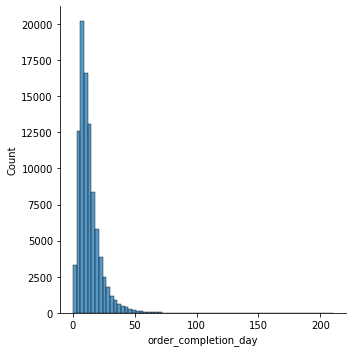

In [13]:
# may need a box plot also
import seaborn as sns
sns.displot(orders, x="order_completion_day", binwidth=3)

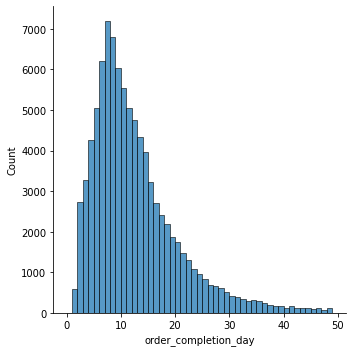

In [14]:
# we can see that most orders are complete within 50 days, and we take a closer look at the orders within 50 days.
x_axis = [i for i in range(50)]
sns.displot(orders, x="order_completion_day", bins=x_axis)
# In order to split these orders fairly, we decides to use k means to determin the 6 categroies.

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
model = KMeans(n_clusters=10, random_state=42)
k_mean_data = orders[numerical_features+['order_id']]
ss = StandardScaler()
for col in numerical_features:
    if col != "order_completion_day":
        k_mean_data[col] = ss.fit_transform(k_mean_data[[col]])
# here we only consider orders delivered within 30 days, since this covers most of the orders and the range is not too big.
k_mean_data = k_mean_data[orders["order_completion_day"]<30].groupby("order_completion_day").agg({"order_id": "count", 'product_weight_g': "mean", 'product_length_cm':"mean", 'product_height_cm':"mean", 'product_width_cm':"mean", "euclidean_distance": "mean"}).rename(columns={"order_id": "count"})

model.fit(k_mean_data[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'euclidean_distance']])
cat = model.predict(k_mean_data[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'euclidean_distance']])
k_mean_data["category"] = cat

/var/folders/rj/lwbxdvp17x162j7s3mxljm2m0000gn/T/ipykernel_1685/2933034594.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mean_data[col] = ss.fit_transform(k_mean_data[[col]])
/var/folders/rj/lwbxdvp17x162j7s3mxljm2m0000gn/T/ipykernel_1685/2933034594.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_mean_data[col] = ss.fit_transform(k_mean_data[[col]])
/var/folders/rj/lwbxdvp17x162j7s3mxljm2m0000gn/T/ipykernel_1685/2933034594.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [16]:
k_mean_data

,count,product_weight_g,product_length_cm,product_height_cm,product_width_cm,euclidean_distance,category
order_completion_day,,,,,,,
0,1,-0.161630,-0.089362,0.673232,0.581805,-0.991895,4
1,597,-0.170289,-0.205683,-0.107859,-0.129561,-0.938358,0
2,2729,-0.175623,-0.129304,-0.134458,-0.126325,-0.921407,0
3,3281,-0.101758,-0.087825,-0.071031,-0.062159,-0.822191,7
4,4257,-0.099890,-0.104882,-0.048555,-0.068406,-0.712947,7
5,5058,-0.102026,-0.071743,-0.053395,-0.051221,-0.597536,7
6,6208,-0.056884,-0.042039,-0.040554,-0.020234,-0.451571,2
7,7195,-0.049813,-0.032107,-0.024232,-0.036884,-0.315804,2
8,6806,-0.035355,-0.028259,-0.018086,0.004853,-0.182170,2


From the k means table we can see that the category is usually split by 3 days. Therefore, we generalize the delivery days as following.

In [21]:
orders.loc[(orders["order_completion_day"] >= 0)&(orders["order_completion_day"] <=2), "target"] = "0-2"
orders.loc[(orders["order_completion_day"] >= 3)&(orders["order_completion_day"] <=5), "target"] = "3-5"
orders.loc[(orders["order_completion_day"] >= 6)&(orders["order_completion_day"] <=8), "target"] = "6-8"
orders.loc[(orders["order_completion_day"] >= 9)&(orders["order_completion_day"] <=11), "target"] = "9-11"
orders.loc[(orders["order_completion_day"] >= 12)&(orders["order_completion_day"] <=14), "target"] = "12-14"
orders.loc[(orders["order_completion_day"] >= 15)&(orders["order_completion_day"] <=17), "target"] = "15-17"
orders.loc[(orders["order_completion_day"] >= 18)&(orders["order_completion_day"] <=20), "target"] = "18-20"
orders.loc[(orders["order_completion_day"] >= 21)&(orders["order_completion_day"] <=23), "target"] = "21-23"
orders.loc[(orders["order_completion_day"] >= 24)&(orders["order_completion_day"] <=26), "target"] = "24-26"
orders.loc[(orders["order_completion_day"] >= 27)&(orders["order_completion_day"] <=29), "target"] = "27-29"
orders.loc[orders["order_completion_day"] >= 30, "target"] = "30+"
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,seller_state,seller_zip_code_prefix,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng,day_name,purchase_month,order_completion_day,euclidean_distance,target
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,9350,9350,-23.680729,-46.444238,Monday,10,8,0.176608,6-8
1,de01100645b731556de153cfbebc35b1,94602ee2b2723266d391c94e7d1f4d89,delivered,2017-08-07 12:13:26,2017-08-07 12:43:37,2017-08-08 13:32:49,2017-08-17 18:24:38,2017-08-29,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,9350,9350,-23.680729,-46.444238,Monday,8,10,4.410140,9-11
2,e55fb3457f263ce9c93e88a934d7cc17,f185f0c103eaf4cdb003c5fd33d29a9c,delivered,2017-09-06 09:52:11,2017-09-06 10:05:16,2017-09-08 16:14:11,2017-09-16 16:19:28,2017-09-19,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,9350,9350,-23.680729,-46.444238,Wednesday,9,10,1.093122,9-11
3,1f201b2bf1eecbd0ad32c3f430846b84,856f3263eb7af3a48765c85d4d0eea1d,delivered,2017-09-26 21:32:17,2017-09-26 21:49:42,2017-09-28 15:28:03,2017-10-03 13:38:04,2017-10-11,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,9350,9350,-23.680729,-46.444238,Tuesday,9,7,0.323955,6-8
4,88407c8c6e12493ff6e845df39540112,e902cb9d9992a69a267f69dec57aa3a3,delivered,2017-08-15 02:03:01,2017-08-15 02:15:13,2017-08-16 15:52:29,2017-08-25 21:59:26,2017-08-28,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,...,SP,9350,9350,-23.680729,-46.444238,Tuesday,8,10,1.003155,9-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92736,4442d1fdf454197e9e141f0d83a9031e,3c3c45651f50bb4b13a4de268cad02b0,delivered,2017-02-03 18:08:16,2017-02-04 07:01:55,2017-02-20 10:49:53,2017-03-01 11:24:45,2017-03-06,7cb009e2ae1cdf7d16e8fbf0255ba953,45a3d05fb00435e52a28859dd03703b3,...,SP,7176,7176,-23.409620,-46.386426,Friday,2,26,11.789703,24-26
92737,a37e262a26000281d0ade3b4eb1ce1e6,d0602b514179e7ed50e801cc02769bac,delivered,2018-08-06 23:14:27,2018-08-06 23:25:19,2018-08-07 14:16:00,2018-08-13 19:08:40,2018-08-22,987ae6d6e94a608f9ea32bc82a649470,466222e777149751370e7e98fb623b0c,...,RJ,20931,20931,-22.880477,-43.217723,Monday,8,7,8.650095,6-8
92738,c31010ef2672e6bae06cf6e265b98138,aa8fe6fdddb25648793aab5b07e5f73d,delivered,2017-02-17 03:09:22,2017-02-17 03:15:08,2017-02-17 07:29:02,2017-02-20 14:44:16,2017-03-23,5f348c2c79eb5d1eea867e7903fce1ee,740205fedfe4e90ca6857bc77db0f2b4,...,SP,95055,95055,-29.151062,-51.142925,Friday,2,3,7.274729,3-5
92739,5c533da06d7dfe10d9d44dbcc8bdbc6b,1285e7456591a89200ad22c4015c09ea,delivered,2017-07-02 13:10:36,2017-07-02 13:25:09,2017-07-07 17:39:39,2017-07-26 22:53:20,2017-08-02,80d63636780c5975e5c93b63236d481d,c8143b3069f6746a77421b5ce30a450c,...,GO,75345,75345,-16.767063,-49.438089,Sunday,7,24,15.923998,24-26


Then we can check the accuracy of the given order_estimated_delivery_date. First we convert the given estimated delivery date into the categories we got from k means.

In [23]:
orders["estimated_completion_day"] = [
        (pd.to_datetime(d.strftime("%Y-%m-%d")) - pd.to_datetime(t.strftime("%Y-%m-%d"))).days
        for d, t in zip(orders["order_estimated_delivery_date"], orders["order_purchase_timestamp"])]
orders.loc[(orders["estimated_completion_day"] >= 0) & (orders["estimated_completion_day"] <= 2), "given_prediction"] = "0-2"
orders.loc[(orders["estimated_completion_day"] >= 3) & (orders["estimated_completion_day"] <= 5), "given_prediction"] = "3-5"
orders.loc[(orders["estimated_completion_day"] >= 6) & (orders["estimated_completion_day"] <= 8), "given_prediction"] = "6-8"
orders.loc[(orders["estimated_completion_day"] >= 9) & (orders["estimated_completion_day"] <= 11), "given_prediction"] = "9-11"
orders.loc[(orders["estimated_completion_day"] >= 12) & (orders["estimated_completion_day"] <= 14), "given_prediction"] = "12-14"
orders.loc[(orders["estimated_completion_day"] >= 15) & (orders["estimated_completion_day"] <= 17), "given_prediction"] = "15-17"
orders.loc[(orders["estimated_completion_day"] >= 18) & (orders["estimated_completion_day"] <= 20), "given_prediction"] = "18-20"
orders.loc[(orders["estimated_completion_day"] >= 21) & (orders["estimated_completion_day"] <= 23), "given_prediction"] = "21-23"
orders.loc[(orders["estimated_completion_day"] >= 24) & (orders["estimated_completion_day"] <= 26), "given_prediction"] = "24-26"
orders.loc[(orders["estimated_completion_day"] >= 27) & (orders["estimated_completion_day"] <= 29), "given_prediction"] = "27-29"
orders.loc[orders["estimated_completion_day"] >= 30, "given_prediction"] = "30+"
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,geolocation_zip_code_prefix_y,seller_geolocation_lat,seller_geolocation_lng,day_name,purchase_month,order_completion_day,euclidean_distance,target,estimated_completion_day,given_prediction
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,9350,-23.680729,-46.444238,Monday,10,8,0.176608,6-8,16,15-17
1,de01100645b731556de153cfbebc35b1,94602ee2b2723266d391c94e7d1f4d89,delivered,2017-08-07 12:13:26,2017-08-07 12:43:37,2017-08-08 13:32:49,2017-08-17 18:24:38,2017-08-29,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,...,9350,-23.680729,-46.444238,Monday,8,10,4.410140,9-11,22,21-23
2,e55fb3457f263ce9c93e88a934d7cc17,f185f0c103eaf4cdb003c5fd33d29a9c,delivered,2017-09-06 09:52:11,2017-09-06 10:05:16,2017-09-08 16:14:11,2017-09-16 16:19:28,2017-09-19,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,...,9350,-23.680729,-46.444238,Wednesday,9,10,1.093122,9-11,13,12-14
3,1f201b2bf1eecbd0ad32c3f430846b84,856f3263eb7af3a48765c85d4d0eea1d,delivered,2017-09-26 21:32:17,2017-09-26 21:49:42,2017-09-28 15:28:03,2017-10-03 13:38:04,2017-10-11,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,...,9350,-23.680729,-46.444238,Tuesday,9,7,0.323955,6-8,15,15-17
4,88407c8c6e12493ff6e845df39540112,e902cb9d9992a69a267f69dec57aa3a3,delivered,2017-08-15 02:03:01,2017-08-15 02:15:13,2017-08-16 15:52:29,2017-08-25 21:59:26,2017-08-28,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,...,9350,-23.680729,-46.444238,Tuesday,8,10,1.003155,9-11,13,12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92736,4442d1fdf454197e9e141f0d83a9031e,3c3c45651f50bb4b13a4de268cad02b0,delivered,2017-02-03 18:08:16,2017-02-04 07:01:55,2017-02-20 10:49:53,2017-03-01 11:24:45,2017-03-06,7cb009e2ae1cdf7d16e8fbf0255ba953,45a3d05fb00435e52a28859dd03703b3,...,7176,-23.409620,-46.386426,Friday,2,26,11.789703,24-26,31,30+
92737,a37e262a26000281d0ade3b4eb1ce1e6,d0602b514179e7ed50e801cc02769bac,delivered,2018-08-06 23:14:27,2018-08-06 23:25:19,2018-08-07 14:16:00,2018-08-13 19:08:40,2018-08-22,987ae6d6e94a608f9ea32bc82a649470,466222e777149751370e7e98fb623b0c,...,20931,-22.880477,-43.217723,Monday,8,7,8.650095,6-8,16,15-17
92738,c31010ef2672e6bae06cf6e265b98138,aa8fe6fdddb25648793aab5b07e5f73d,delivered,2017-02-17 03:09:22,2017-02-17 03:15:08,2017-02-17 07:29:02,2017-02-20 14:44:16,2017-03-23,5f348c2c79eb5d1eea867e7903fce1ee,740205fedfe4e90ca6857bc77db0f2b4,...,95055,-29.151062,-51.142925,Friday,2,3,7.274729,3-5,34,30+
92739,5c533da06d7dfe10d9d44dbcc8bdbc6b,1285e7456591a89200ad22c4015c09ea,delivered,2017-07-02 13:10:36,2017-07-02 13:25:09,2017-07-07 17:39:39,2017-07-26 22:53:20,2017-08-02,80d63636780c5975e5c93b63236d481d,c8143b3069f6746a77421b5ce30a450c,...,75345,-16.767063,-49.438089,Sunday,7,24,15.923998,24-26,31,30+


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"The accuracy of the predictions in the original dataset: {accuracy_score(orders['target'], orders['given_prediction'])}\n")

The accuracy of the predictions in the original dataset: 0.056361264165795066



Now we will build our own prediction model using Decision Trees, Random Forests, Gradient Boosted Trees and find the best model.